<img src='images/knowsis_logo.png' width=200>

# Detecting novel anomalies in Twitter

### Delia Rusu and Mattia Boni Sforza

#### PyData London 2016

# About Us

### Delia Rusu

PhD: Natural Language Processing and Machine Learning

delia@knowsis.com

https://github.com/deliarusu


### Mattia Boni Sforza

MSc: Statistics

mattia@knowsis.com

https://github.com/mattiabs

<img src='images/knowsis_logo.png' align='right' width=100>

# Knowsis

<a href="https://insights.knows.is/?utm_source=pydata-london-2016&utm_medium=web&utm_campaign=link" target="_blank">Knowsis</a> is a social-intelligence company providing social media analytics for finance. 

<img src='images/knowsis_activites.png'>

<img src='images/knowsis_logo.png' align='right' width=100>

# Knowsis

Topics of research:
- named entity recognition, disambiguation and linking
- event detection
- sentiment analysis
- social network analysis

- **anomaly detection**
- **novelty detection**

<img src='images/knowsis_logo.png' align='right' width=100>

## Q: What is the task?
### A: Detect Novel Anomalies in Twitter

System which promptly flags the user when there is a **novel anomaly** in **social activity**

- **Novel**?
  * Not previously encountered 
- Novel **Anomaly**?
  * Something that deviates from what is standard, normal, or expected
- Novel Anomaly in **social activity**?
  * Unexpected amount of tweets in short time which creates a spike in tweets volume

<img src='images/knowsis_logo.png' align='right' width=100>

<img src="images/VW_chart_motivation.png">

<img src='images/knowsis_logo.png' align='right' width=100>

## Novel anomalies detection pipeline

<img src='images/anomaly_flow_background.png'>

<img src='images/knowsis_logo.png' align='right' width=100>

# Main Challenges 

- Identify unusual activity **promptly**
- Avoid false anomalies

<img src='images/VW_chart.jpg'>

<img src='images/knowsis_logo.png' align='right' width=100>

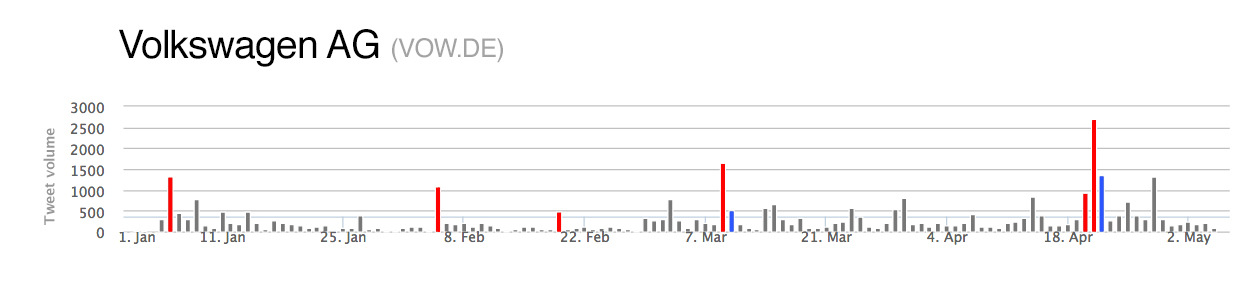

In [1]:
from IPython.core.display import Image, display
display(Image('images/VW_chart.jpg', unconfined=True))


## What you need

1. Define a variable to measure
  * what is the main characteristic that makes the data anomalous?
2. Establish if the observed variable is unexpected
  * how to quantify the unexpected nature of this quantity?

## Approach

1. Variable to measure is the count of tweets given a fixed time window (aka rate)
2. Consists of two steps:
  * Predict the tweets count given some predictor variables (characteristics of the data known in advance)
  * Use the prediction to establish how (un)likely it is to observe such a tweets volume

<img src='images/knowsis_logo.png' align='right' width=100>

OTHER WAYS TO DO IT 
pretty important 
means you can apply this approach to any problem which involves events happening in time (sensor, serer requests, biochimical..)

Define features which make the measured variable unexpected 
Consider a different quantity (or quality) and define what anomalous means with respect to this new target (inter-arrival times, another quantity, another approach bayesian)

## Model the tweets rate

- Static volume
- Dinamic amount to account for seasonality 
- Include short time memory to only detect spikes

<img src='images/VW_chart.jpg'>

<img src='images/knowsis_logo.png' align='right' width=100>

Natural way to model counts of events happening in time is to use a Poisson process $N(t)$ with parameter $\lambda$, the rate at which the events happen

$$ \mathbb{E}[N(t)] = \textbf{expected number of events occurred until time } t = \lambda t$$

A Poisson regression models the logarithm of the expected number of events as a **linear combination** of predictor variables

$$ \log(\mathbb{E}[N]) = log(\lambda) =  \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k $$

with $\beta_i$ coefficients of the model estimated based on volume history and $x_i$ observable quantities of the datapoint.

<img src='images/knowsis_logo.png' align='right' width=100>

## Predictor variables for $\lambda$
Consider seasonality at different scales 
- day of the week $x_w$ 
- hour of the day $x_h$ 
- month (?)
- ...

Consider recent behaviour
- count in the previous time window $x_{t-1}$
- count 2 time windows before $x_{t-2}$
- ...
- count for the day so far or yesterday (?)

Other variables?
- ...

<img src='images/knowsis_logo.png' align='right' width=100>

## Detect the anomaly

With the expected rate $\lambda_{pred}$, how (un)likely is that we see a number of tweets $N$ higher than the one we have so far? 

If this event has probability lower than $\alpha$, it is anomalous!

$$\mathbb{P}(N \geq n_{obs} | \lambda_{pred}) < \alpha$$

<img src='images/knowsis_logo.png' align='right' width=100>

## Pros 

- timely (predict in advance)
- unsupervised (no need for annotations)
- easily adapt to different time scales 
- easy to extend and include more predictors
- applicable to discrete data of different nature
- Generalised Linear Model applicable to different distribution families

## ...and Cons

- needs other algorithms to determine if the anomaly is geneuine (spam driven, somehow expected, ...)
- higly sensitive (try Zero inflated Poisson)
- variance and expected value are the same (try Negative Binomial)

<img src='images/knowsis_logo.png' align='right' width=100>

# Novelty Detection

Given an **anomaly period**, identify which tweets are **novel**

Observation: tweets tend to cluster in **stories**

Given an **anomaly period**, identify the tweets which are ~~novel~~ **not part of old stories**

<img src='images/knowsis_logo.png' align='right' width=100>

# VW Example

<img src='images/VW_example_novelty_marked.png'>

<img src='images/knowsis_logo.png' align='right' width=100>

# Challenges

- **streaming** setting - each tweet needs to be processed in **bounded space** and **time**
  - bounded space - constant amount of stories in memory   
  - bounded time - Locality Sensitive Hashing (Indyk and Motwani, 1998)

- how much history is required to decide if a tweet is novel

- stories can be reoccurring

<img src='images/knowsis_logo.png' align='right' width=100>

# First Story Detection

<img src='images/first_story_detection_article.png'>

<img src='images/knowsis_logo.png' align='right' width=100>

# Locality Sensitive Hashing

- approximate nearest neighbor task
- hashing each tweet into buckets to maximize the probability of collision for tweets which are close
- requires a measure of distance for tweets

Advantage:
- LSH works well if tweet is close to its nearest neighbor

Disadvantage:
- LSH fails to return the nearest neighbor for distant tweets
- Solution: if the LSH doesn't return a neighbor, check novelty against most recent tweets

<img src='images/knowsis_logo.png' align='right' width=100>

# Novelty Flow

<img src="images/LSH_flow.png" align='center' width=300>

<img src='images/knowsis_logo.png' align='right' width=100>

# Conclusions

- general anomaly detection algorithm which is:
  - applicable to different problems
  - easily understandable
  - fast training and detection
  - works well in a streaming pipeline
  
- two-step novelty detection
  - fast lookup using LSH
  - additional lookup in inverted index for the most recent tweets

<img src='images/knowsis_logo.png' align='right' width=100>

# Thank You!

<br>

Presentation & Notebooks:

https://github.com/knowsis/novel-twitter-anomalies-pydatalondon2016/


<br>

<a href="mailto:delia@knowsis.com">delia@knowsis.com</a>

<a href="mailto:mattia@knowsis.com">mattia@knowsis.com</a>


<img src='images/knowsis_logo.png' align='right' width=100>